In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
cd /content/drive/MyDrive/Me\ --\ Education/Topics/AI/Machine Learning Dr. Montazeri/Project/ml_mda

/content/drive/MyDrive/Me -- Education/Topics/AI/Machine Learning Dr. Montazeri/Project/ml_mda


In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00


In [5]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 59.0 MB/s eta 0:00:00


In [6]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f12e7aa543531650ad3d241654012e15e1ed44e51d61747c24d404e8b6d2a7b7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [7]:
c1 = '#84a59d'
c2 = '#f28482'

# Requirements

In [8]:
import torch

from torch.optim import Adam
from torch_geometric.nn import ComplEx, DistMult, RotatE, TransE
from torch_geometric.data import Data

from base import OptimizerConfig, cross_validation
from base import SimplePytorchData, SimplePytorchDataTrainTestSplit
from base import SimpleTrainer, SimpleTester
from src.config import Node2VecConfig, Node2VecOptimizerConfig, SimpleClassifierConfig
from src.features import get_node2vec_pair_embedd_for_training_data, get_associations, get_gae_pair_embedd_for_training_data
from src.config import SimpleClassifierConfig, GraphAutoEncoderConfig, KGEConfig
from src.features import get_relations, get_entities, get_associations, get_homogeneous_graph, get_kge_pair_embedd_for_training_data
from src.models import SimpleMDAClassifier, SimpleMDAClassifierFactory
from src.utils import train_test_sampler, prj_logger
from torch_geometric.nn import GCNConv

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
import logging
import sys

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler(stream=sys.stdout)
    ],
    force=True
)

# Labels

In [12]:
associations = get_associations()
y = associations['increased'].tolist()
y[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# TransE

## Config

In [13]:
kge_optimizer_config = OptimizerConfig()
kge_optimizer_config.optimizer = torch.optim.Adam
kge_optimizer_config.lr = 0.01
kge_optimizer_config.batch_size = 1000
kge_optimizer_config.n_epoch = 40
kge_optimizer_config.exp_name = "Optimizer for Graph Auto Encoder"
kge_optimizer_config.device = device
kge_optimizer_config.report_size = device

In [14]:
kge_model_config = KGEConfig()
kge_model_config.kge = TransE
kge_model_config.hidden_channels = 32

## Embedding

In [15]:
md_embed = get_kge_pair_embedd_for_training_data(kge_model_config, kge_optimizer_config)

2024-02-17 16:30:32,071 [INFO] Calling get_node2vec_pair_embedd on cpu device ...
2024-02-17 16:30:32,074 [INFO] Calling get_homogeneous_graph
2024-02-17 16:30:36,470 [INFO] homogeneous data : Data(x=[66911, 1], edge_index=[2, 633662])
2024-02-17 16:30:36,486 [INFO] Calling get_kge_embedd on cpu device ...
2024-02-17 16:30:36,492 [INFO] Calling get_knowledge_graph
2024-02-17 16:30:39,244 [INFO] knowledge graph data : Data(num_nodes=66911, edge_index=[2, 633662], edge_type=[633662])
2024-02-17 16:30:39,292 [INFO] Setting num relations and num nodes for kge config to 39 and 66911
2024-02-17 16:30:39,302 [INFO] Creating KGE model ...
2024-02-17 16:30:39,305 [INFO] Initialing MDATransE with model_config {'model_name': None}
2024-02-17 16:30:39,463 [INFO] Training KGE ...
2024-02-17 16:30:39,468 [INFO] Running KGETrainer with Optimizer for Graph Auto Encoder
2024-02-17 16:30:39,472 [INFO] Creating <class 'torch.optim.adam.Adam'> with lr : 0.01
2024-02-17 16:30:39,481 [INFO] moving model to 

## tSNE

In [16]:
tsne = TSNE(n_components=2, random_state=42)
transe_tsne_embedd = tsne.fit_transform(md_embed.to('cpu'))[:, :2]

## PCA

In [17]:
pca = PCA(n_components=2, random_state=42)
transe_pca_embedd = pca.fit_transform(md_embed.to('cpu'))[:, :2]

## UMAP

In [18]:
reducer = umap.UMAP()
transe_umap_embedd = reducer.fit_transform(md_embed.to('cpu'))[:, :2]

# ComplEx

## Config

In [19]:
kge_optimizer_config = OptimizerConfig()
kge_optimizer_config.optimizer = torch.optim.Adam
kge_optimizer_config.lr = 0.01
kge_optimizer_config.batch_size = 1000
kge_optimizer_config.n_epoch = 30
kge_optimizer_config.exp_name = "Optimizer for Graph Auto Encoder"
kge_optimizer_config.device = device
kge_optimizer_config.report_size = device

In [20]:
kge_model_config = KGEConfig()
kge_model_config.kge = ComplEx
kge_model_config.hidden_channels = 32

## Embedding

In [21]:
complex_embed = get_kge_pair_embedd_for_training_data(kge_model_config, kge_optimizer_config)

2024-02-17 16:47:14,056 [INFO] Calling get_node2vec_pair_embedd on cpu device ...
2024-02-17 16:47:14,058 [INFO] Calling get_homogeneous_graph
2024-02-17 16:47:14,905 [INFO] homogeneous data : Data(x=[66911, 1], edge_index=[2, 633662])
2024-02-17 16:47:14,910 [INFO] Calling get_kge_embedd on cpu device ...
2024-02-17 16:47:14,913 [INFO] Calling get_knowledge_graph
2024-02-17 16:47:16,061 [INFO] knowledge graph data : Data(num_nodes=66911, edge_index=[2, 633662], edge_type=[633662])
2024-02-17 16:47:16,065 [INFO] Setting num relations and num nodes for kge config to 39 and 66911
2024-02-17 16:47:16,068 [INFO] Creating KGE model ...
2024-02-17 16:47:16,070 [INFO] Initialing MDATransE with model_config {'model_name': None}
2024-02-17 16:47:16,150 [INFO] Training KGE ...
2024-02-17 16:47:16,151 [INFO] Running KGETrainer with Optimizer for Graph Auto Encoder
2024-02-17 16:47:16,154 [INFO] Creating <class 'torch.optim.adam.Adam'> with lr : 0.01
2024-02-17 16:47:16,157 [INFO] moving model to 

## tSNE

In [22]:
tsne = TSNE(n_components=2, random_state=42)
complex_tsne_embedd = tsne.fit_transform(complex_embed.to('cpu'))[:, :2]

## PCA

In [23]:
pca = PCA(n_components=2, random_state=42)
complex_pca_embedd = pca.fit_transform(complex_embed.to('cpu'))[:, :2]

## UMAP

In [24]:
reducer = umap.UMAP()
complex_umap_embedd = reducer.fit_transform(complex_embed.to('cpu'))[:, :2]

# Node2Vec

## Configs

In [25]:
# Node2Vec Config
node2vec_config = Node2VecConfig()
node2vec_config.embedding_dim = 32
node2vec_config.walk_length = 50
node2vec_config.context_size = 10
node2vec_config.walks_per_node = 10
node2vec_config.num_negative_samples = 1
node2vec_config.p = 1.0
node2vec_config.q = 1.0
node2vec_config.num_nodes = None
node2vec_config.sparse = True

# Node2Vec Optimizer Config
node2vec_optimizer_config = Node2VecOptimizerConfig()
node2vec_optimizer_config.exp_name = 'Node2VecOptimizer Default'
node2vec_optimizer_config.shuffle = True
node2vec_optimizer_config.num_workers = 2
node2vec_optimizer_config.lr = 0.01
node2vec_optimizer_config.device = device
node2vec_optimizer_config.report_size = 1000
node2vec_optimizer_config.optimizer = torch.optim.SparseAdam

## Embeddings

In [26]:
node2vec_embed = get_node2vec_pair_embedd_for_training_data(node2vec_config, node2vec_optimizer_config)

2024-02-17 17:04:15,502 [INFO] Calling get_node2vec_pair_embedd on cpu device ...
2024-02-17 17:04:15,503 [INFO] Calling get_homogeneous_graph
2024-02-17 17:04:16,289 [INFO] homogeneous data : Data(x=[66911, 1], edge_index=[2, 633662])
2024-02-17 17:04:16,293 [INFO] Calling get_node2vec_embedd on cpu device ...
2024-02-17 17:04:16,297 [INFO] Creating Node2Vec model ...
2024-02-17 17:04:16,299 [INFO] Calling get_homogeneous_graph
2024-02-17 17:04:17,041 [INFO] homogeneous data : Data(x=[66911, 1], edge_index=[2, 633662])
2024-02-17 17:04:17,048 [INFO] Initialing MDNode2Vec with model_config {'model_name': None, 'embedding_dim': 32, 'walk_length': 50}
2024-02-17 17:04:17,257 [INFO] Training Node2Vec ...
2024-02-17 17:04:17,260 [INFO] Running Node2vecTrainer with Node2VecOptimizer Default
2024-02-17 17:04:17,262 [INFO] Creating <class 'torch.optim.sparse_adam.SparseAdam'> with lr : 0.01
2024-02-17 17:04:17,267 [INFO] moving model to cpu
2024-02-17 17:04:17,269 [INFO] start batch optimizin

## tSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
node2vec_tsne_embedd = tsne.fit_transform(node2vec_embed)[:, :2]

## PCA

In [ ]:
pca = PCA(n_components=2, random_state=42)
node2vec_pca_embedd = pca.fit_transform(node2vec_embed)[:, :2]

## UMAP

In [ ]:
reducer = umap.UMAP()
node2vec_umap_embedd = reducer.fit_transform(node2vec_embed)[:, :2]

# Graph Auto Encoder Embedding

## Config

In [ ]:
gae_optimizer_config = OptimizerConfig()
gae_optimizer_config.optimizer = torch.optim.Adam
gae_optimizer_config.criterion = torch.nn.BCEWithLogitsLoss()
gae_optimizer_config.lr = 0.01
gae_optimizer_config.n_epoch = 50
gae_optimizer_config.exp_name = "Optimizer for Graph Auto Encoder"
gae_optimizer_config.device = device

In [ ]:
gae_model_config = GraphAutoEncoderConfig()
gae_model_config.model_name = "Graph Auto Encoder Model"
gae_model_config.device = device
gae_model_config.input_dim = get_homogeneous_graph(device).x.shape[0]
gae_model_config.hidden_dim = 32
gae_model_config.output_dim = 32
gae_model_config.num_layers = 2
gae_model_config.dropout = 0.5
gae_model_config.with_embedd = True
gae_model_config.GCN = GCNConv

## Embedding

In [32]:
gae_embed = get_gae_pair_embedd_for_training_data(gae_model_config, gae_optimizer_config)

2024-02-17 17:16:02,327 [INFO] Calling get_gae_pair_embedd on cpu device ...
2024-02-17 17:16:02,330 [INFO] Calling get_homogeneous_graph
2024-02-17 17:16:03,672 [INFO] homogeneous data : Data(x=[66911, 1], edge_index=[2, 633662])
2024-02-17 17:16:03,675 [INFO] Calling get_node2vec_embedd on cpu device ...
2024-02-17 17:16:03,677 [INFO] Creating GraphAutoEncoderModel ...
2024-02-17 17:16:03,680 [INFO] Initializing GraphAutoEncoderModel with config : {'model_name': 'Graph Auto Encoder Model', 'input_dim': 66911, 'hidden_dim': 32, 'output_dim': 32, 'num_layers': 2, 'dropout': 0.5, 'with_embedd': True, 'GCN': <class 'torch_geometric.nn.conv.gcn_conv.GCNConv'>}
2024-02-17 17:16:03,682 [INFO] Initializing GCNAutoEncoder ...
2024-02-17 17:16:03,684 [INFO] Initial GCNEncoder with 66911 input_dimension,
            32 hidden dimension, 32 output dimension,
            2 layers and with 0.5 dropout
2024-02-17 17:16:03,833 [INFO] Initial LinkDecoder
2024-02-17 17:16:03,837 [INFO] Calling get_hom

## tSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
gae_tsne_embedd = tsne.fit_transform(gae_embed)[:, :2]

## PCA

In [ ]:
pca = PCA(n_components=2, random_state=42)
gae_pca_embedd = pca.fit_transform(gae_embed)[:, :2]

## UMAP

In [ ]:
reducer = umap.UMAP()
gae_umap_embedd = reducer.fit_transform(gae_embed)[:, :2]

# tSNE Comparision

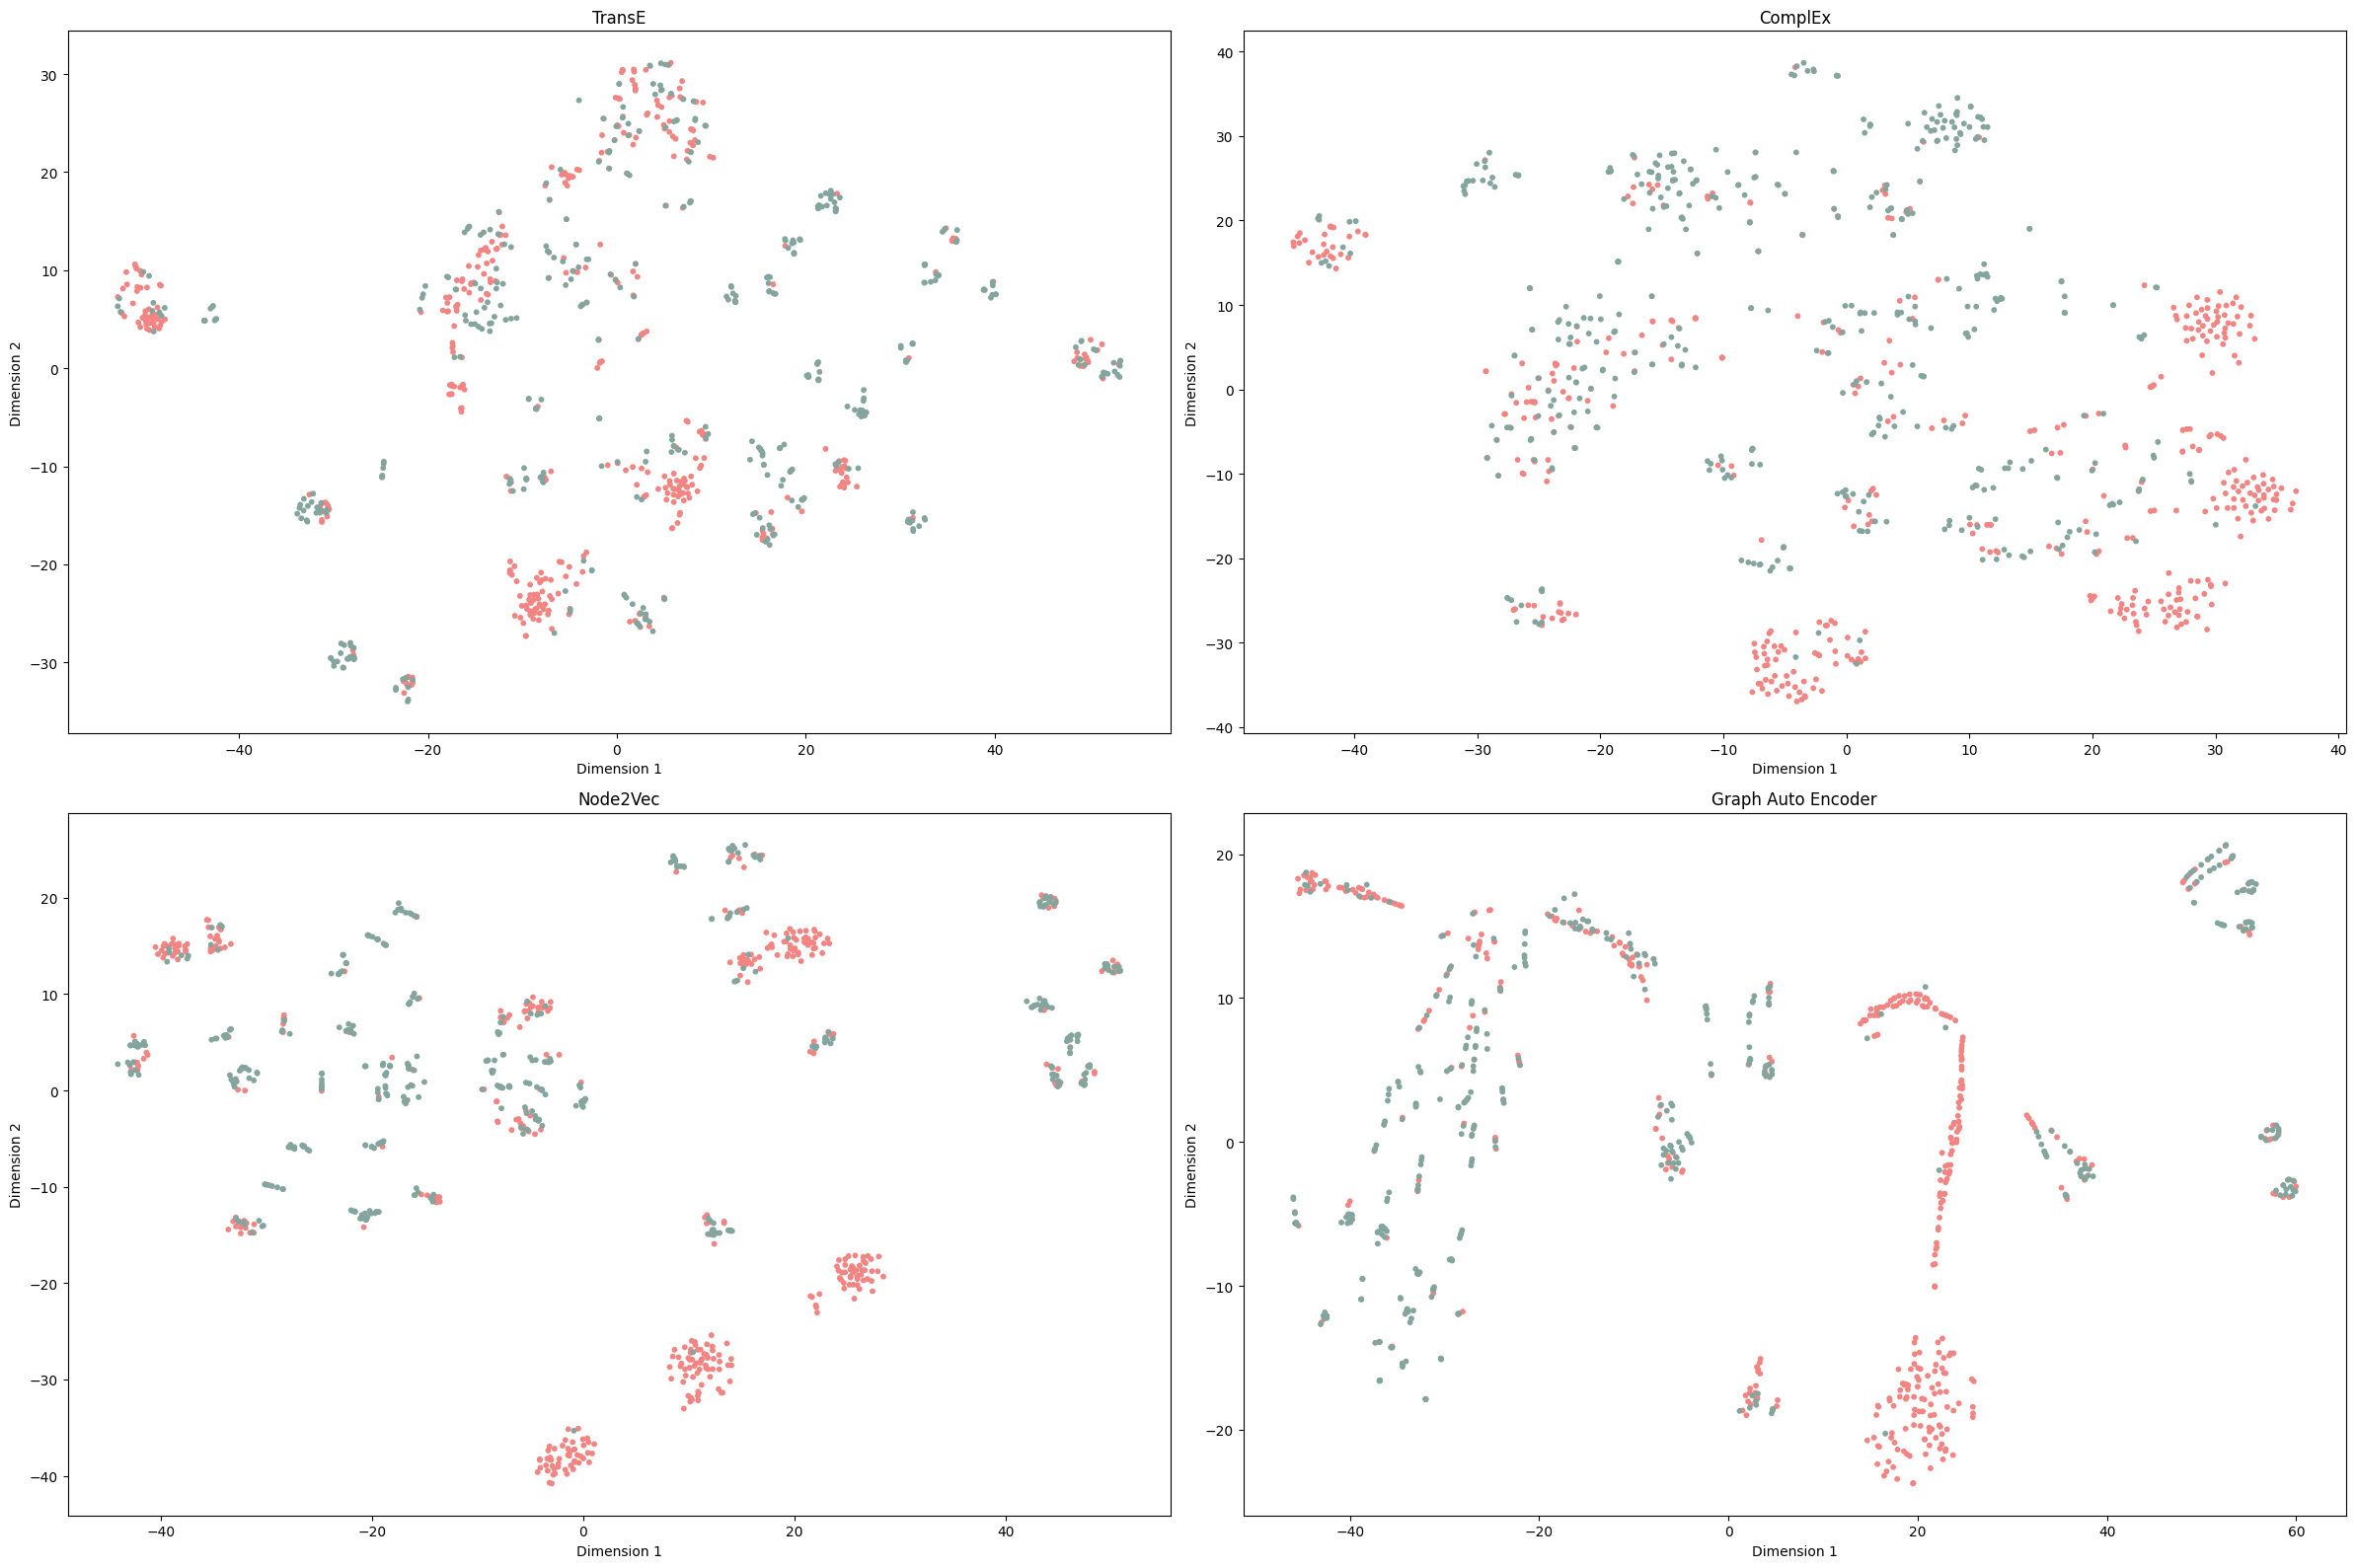

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))

colors = [c1, c2]
cmap = ListedColormap(colors)

axes[0, 0].scatter(transe_tsne_embedd[:, 0], transe_tsne_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 0].set_title('TransE')

axes[0, 1].scatter(complex_tsne_embedd[:, 0], complex_tsne_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 1].set_title('ComplEx')

axes[1, 0].scatter(node2vec_tsne_embedd[:, 0], node2vec_tsne_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 0].set_title('Node2Vec')

axes[1, 1].scatter(gae_tsne_embedd[:, 0], gae_tsne_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 1].set_title('Graph Auto Encoder')

for ax in axes.flat:
    ax.set(xlabel='Dimension 1', ylabel='Dimension 2')

plt.tight_layout()
plt.show()

# PCA Comparision

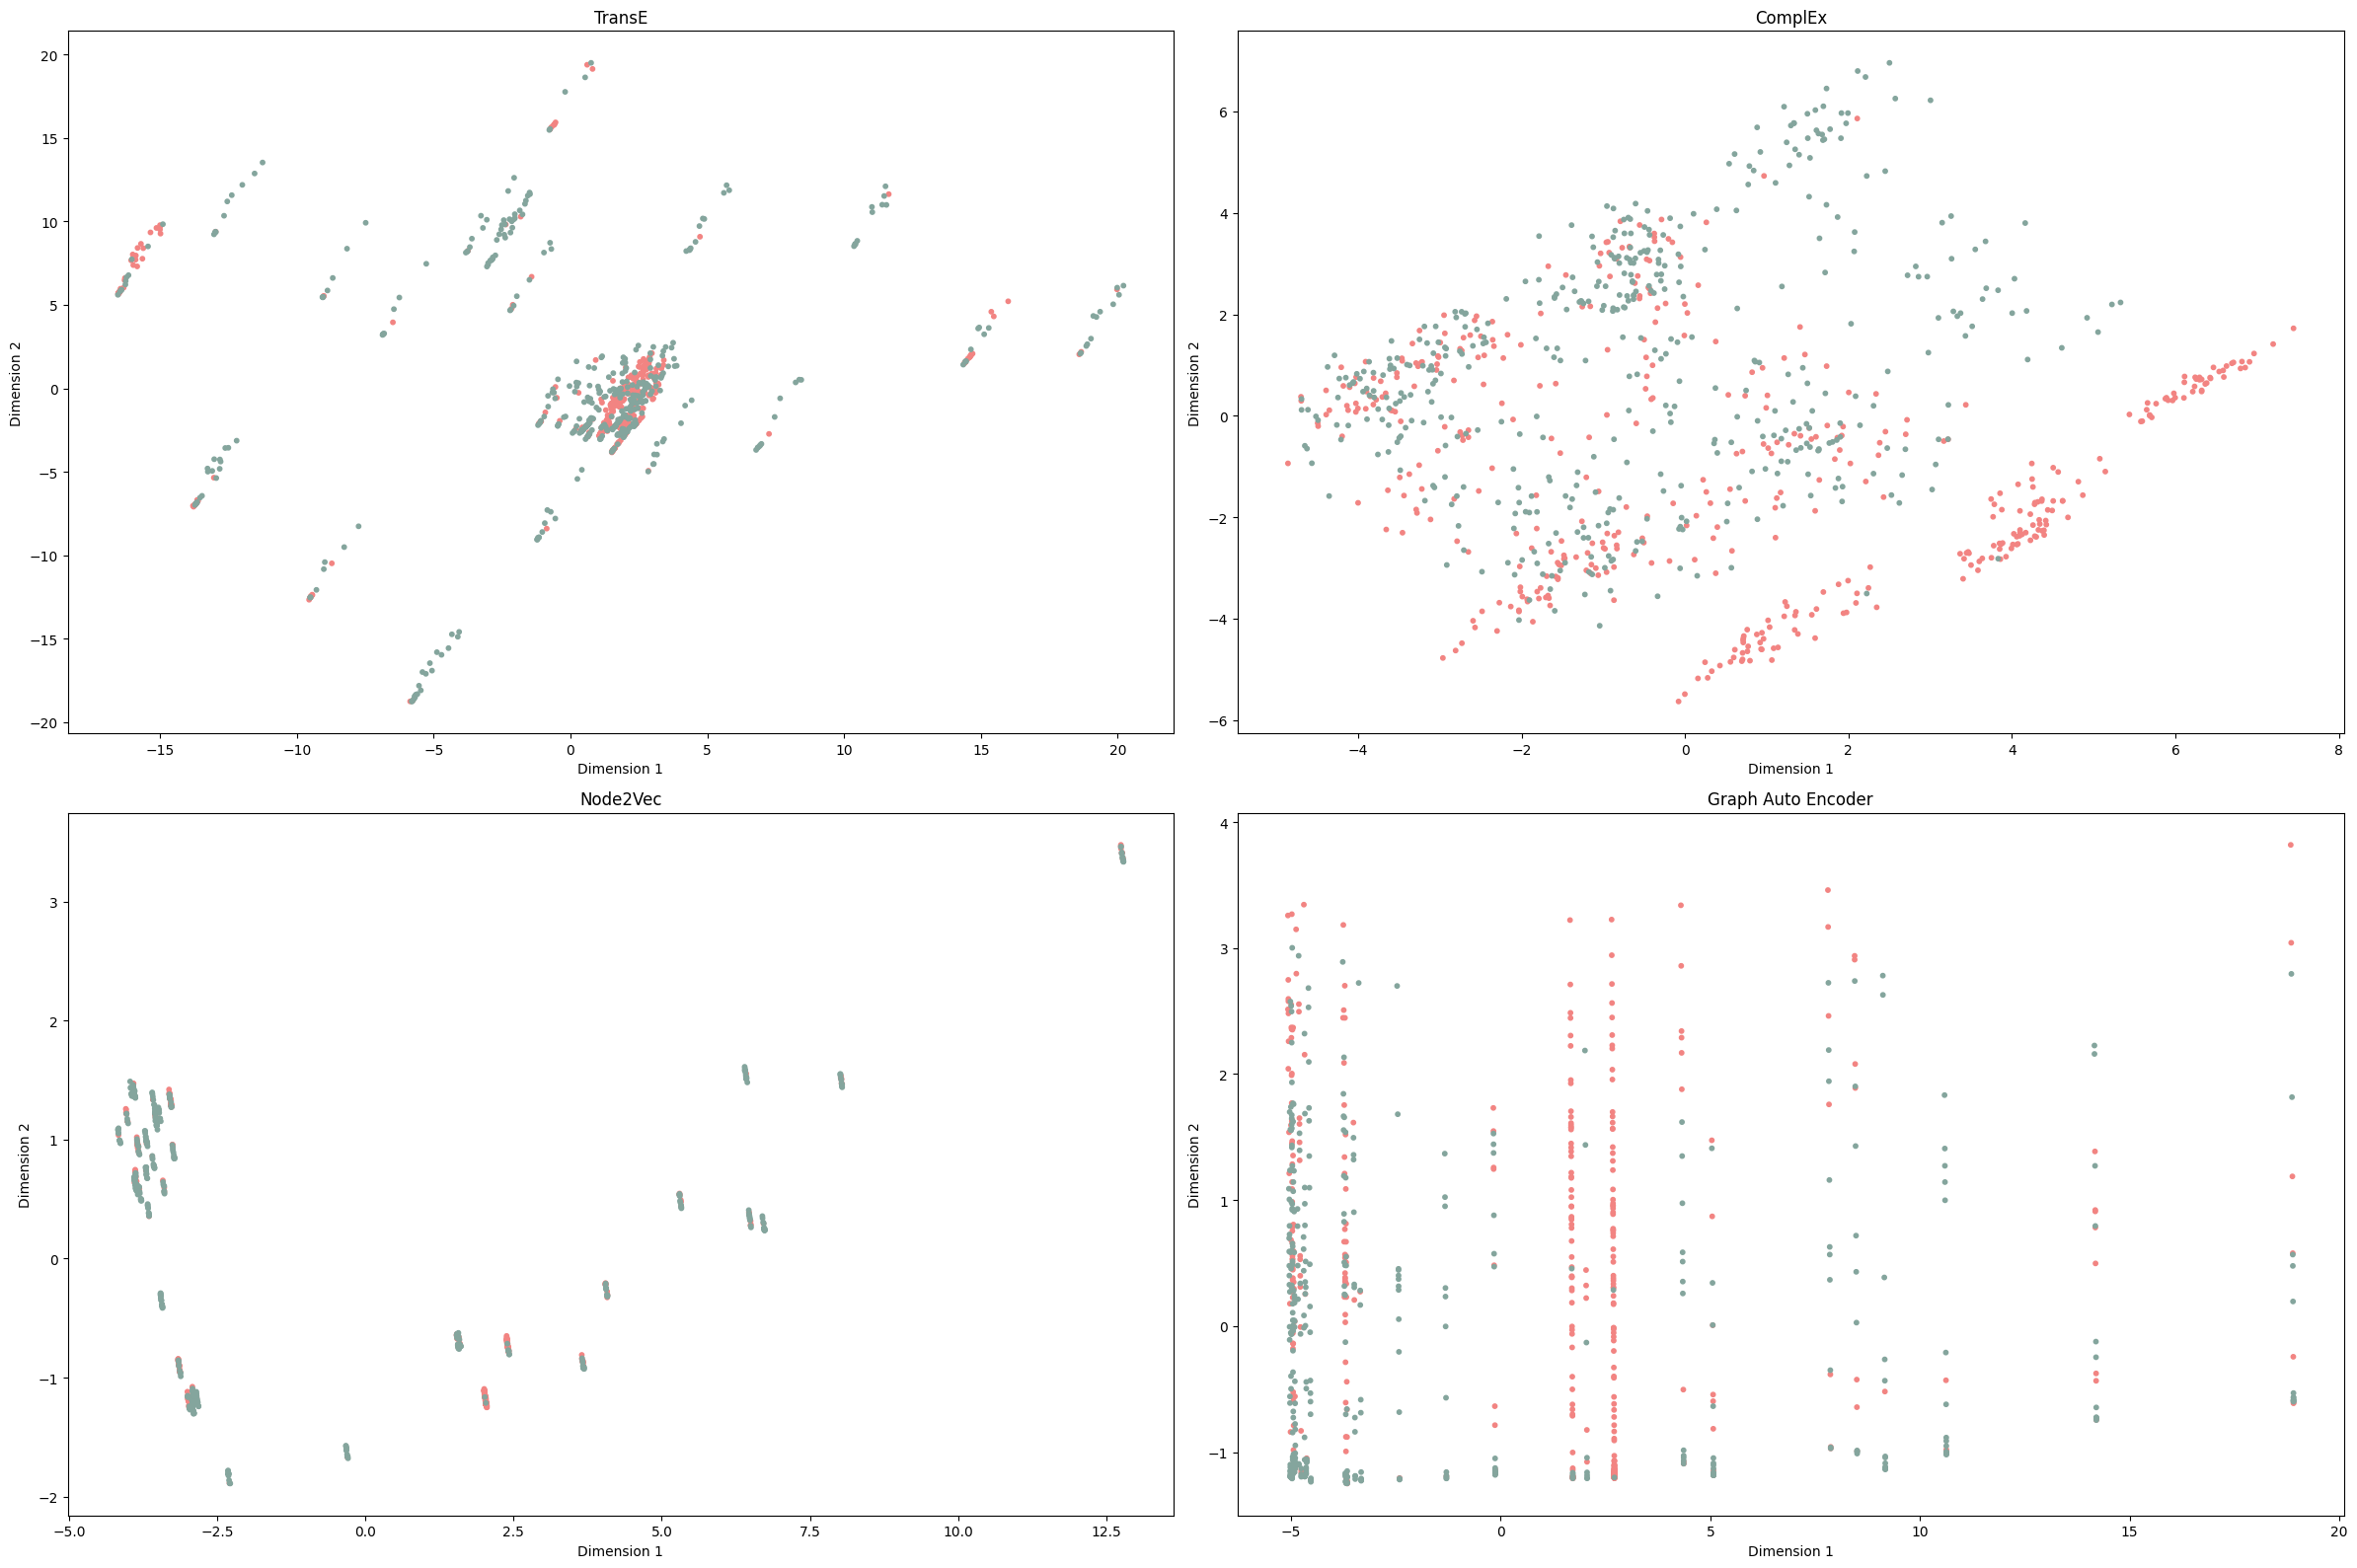

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))

colors = [c1, c2]
cmap = ListedColormap(colors)

axes[0, 0].scatter(transe_pca_embedd[:, 0], transe_pca_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 0].set_title('TransE')

axes[0, 1].scatter(complex_pca_embedd[:, 0], complex_pca_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 1].set_title('ComplEx')

axes[1, 0].scatter(node2vec_pca_embedd[:, 0], node2vec_pca_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 0].set_title('Node2Vec')

axes[1, 1].scatter(gae_pca_embedd[:, 0], gae_pca_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 1].set_title('Graph Auto Encoder')

for ax in axes.flat:
    ax.set(xlabel='Dimension 1', ylabel='Dimension 2')

plt.tight_layout()
plt.show()

# UMAP Comparision

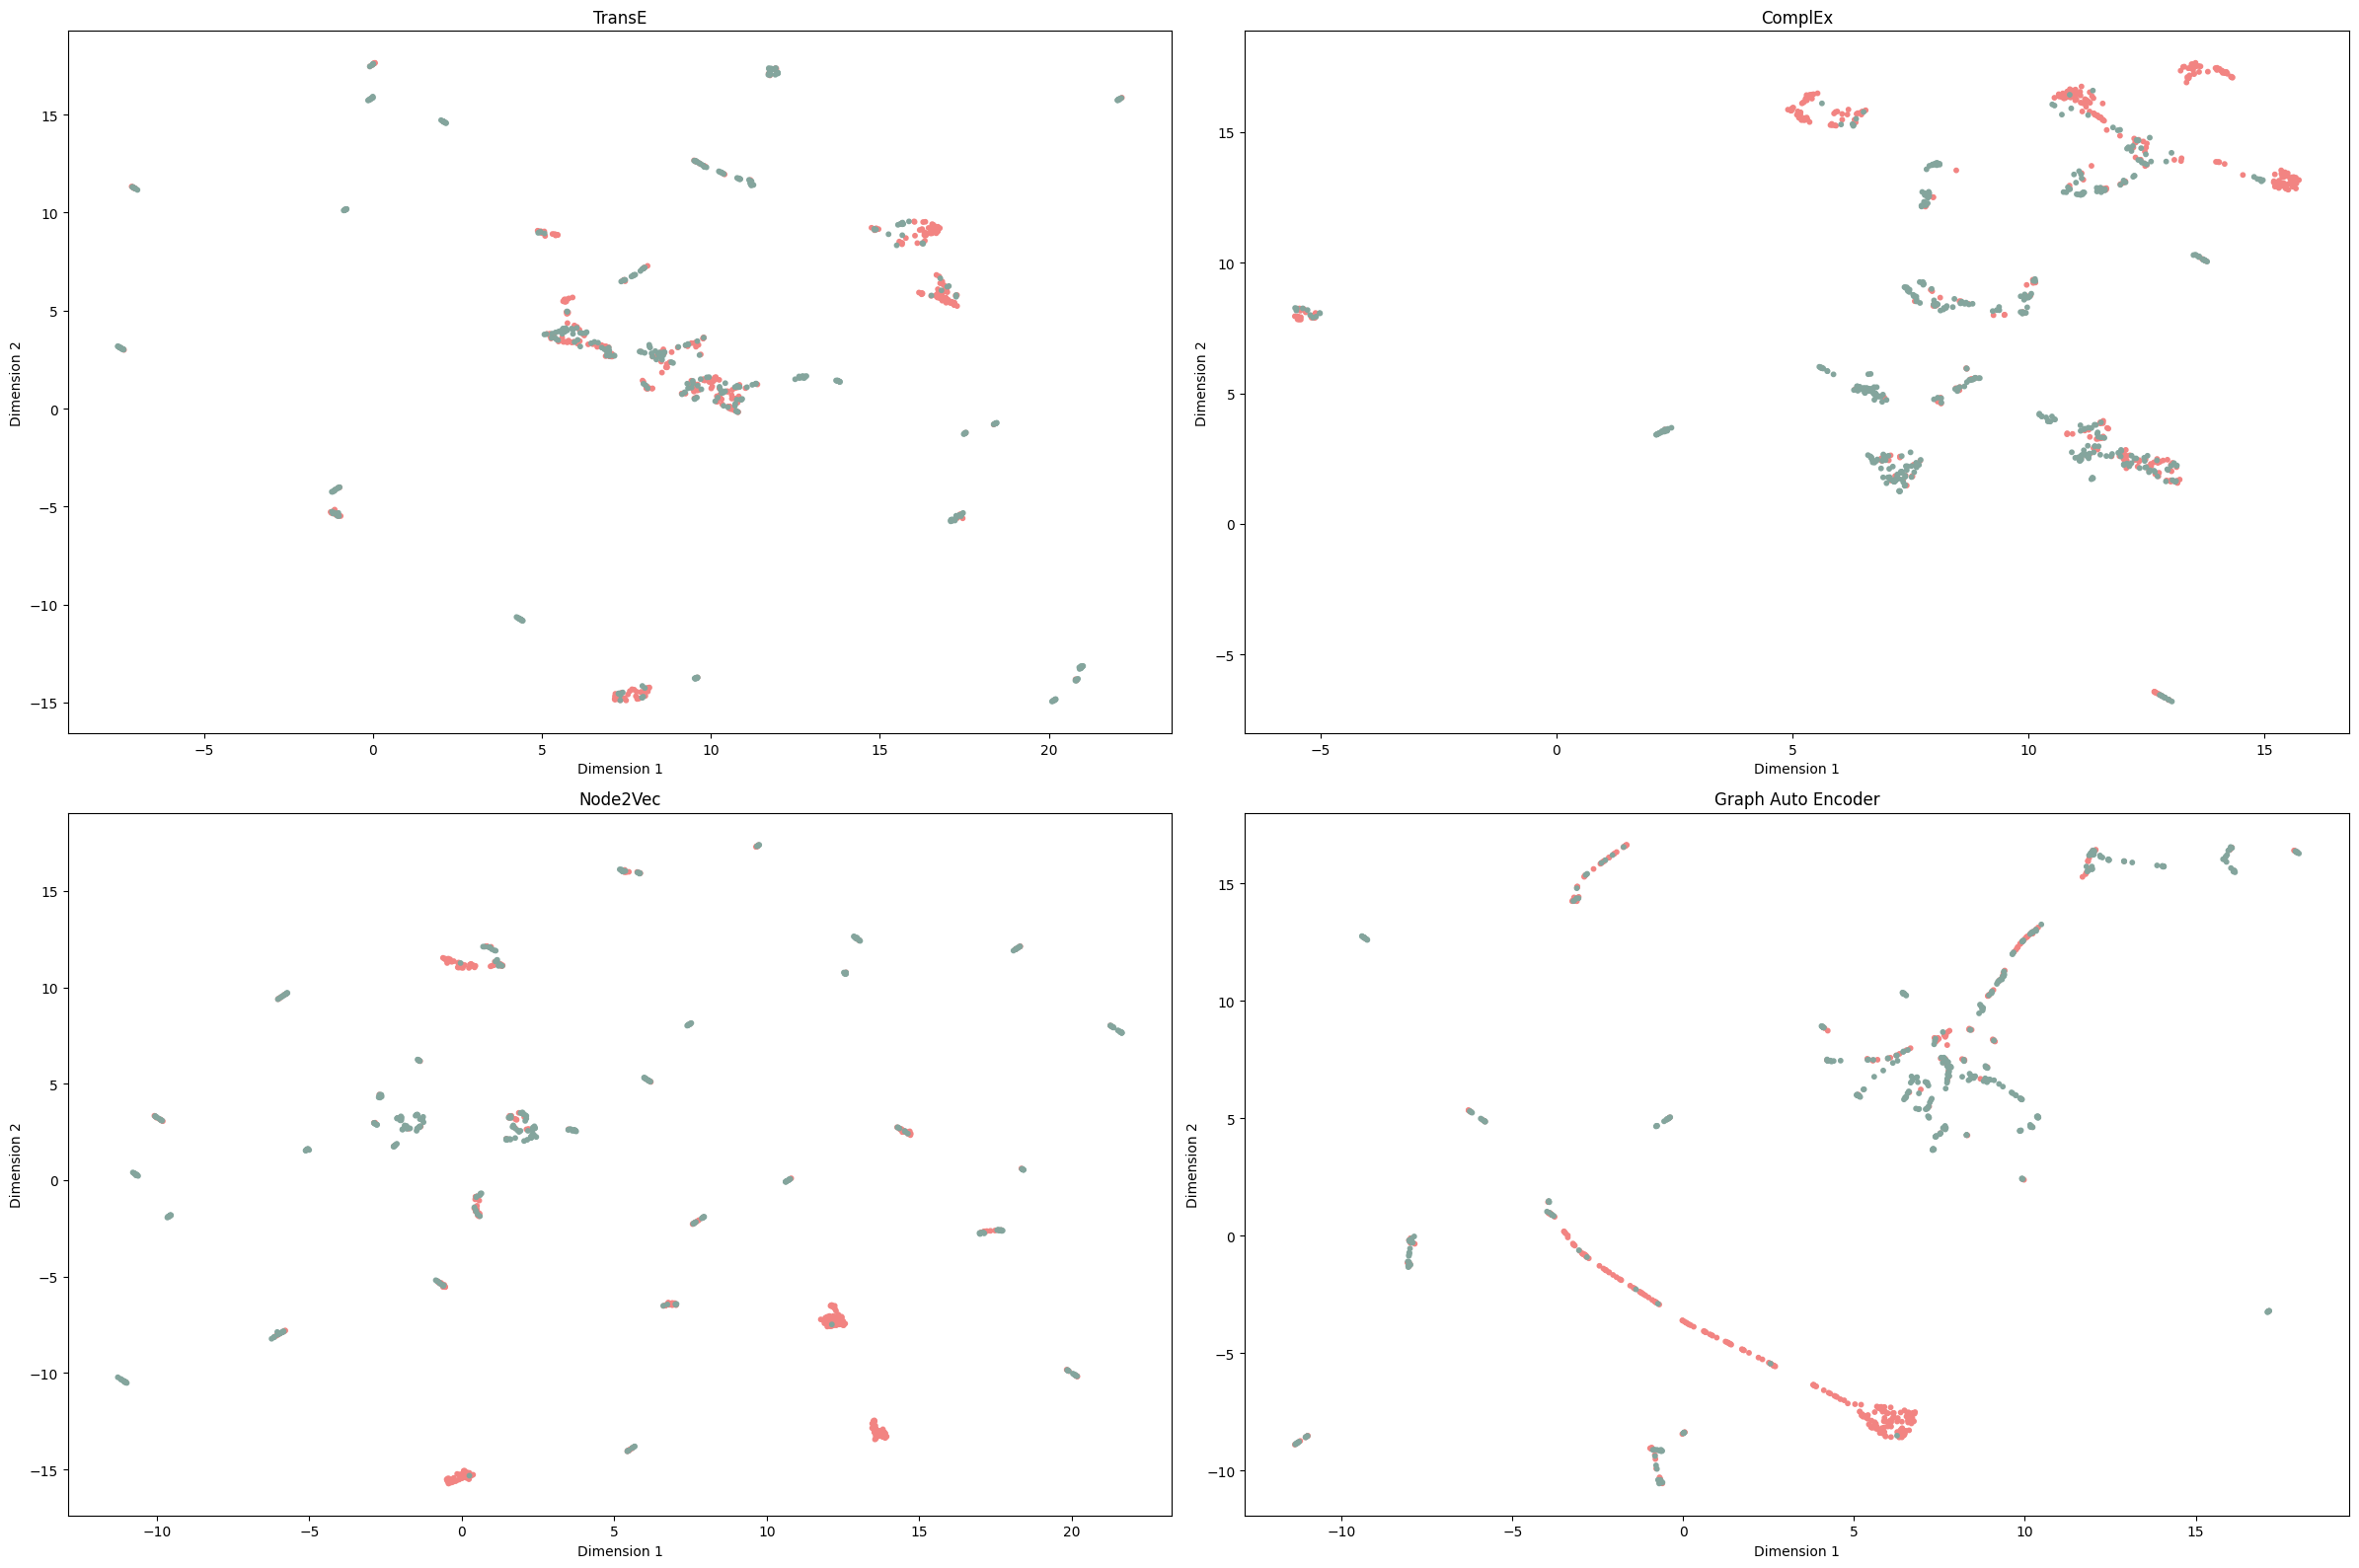

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))

colors = [c1, c2]
cmap = ListedColormap(colors)

axes[0, 0].scatter(transe_umap_embedd[:, 0], transe_umap_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 0].set_title('TransE')

axes[0, 1].scatter(complex_umap_embedd[:, 0], complex_umap_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[0, 1].set_title('ComplEx')

axes[1, 0].scatter(node2vec_umap_embedd[:, 0], node2vec_umap_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 0].set_title('Node2Vec')

axes[1, 1].scatter(gae_umap_embedd[:, 0], gae_umap_embedd[:, 1], s=10, c=y, cmap=cmap)
axes[1, 1].set_title('Graph Auto Encoder')

for ax in axes.flat:
    ax.set(xlabel='Dimension 1', ylabel='Dimension 2')

plt.tight_layout()
plt.show()